<a href="https://colab.research.google.com/github/AryanPhanse/ml/blob/main/1_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression:

Y = wX + b

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

Gradient Descent:

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

Learning Rate():

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.


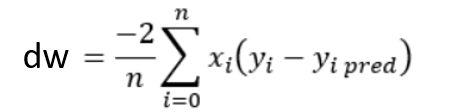

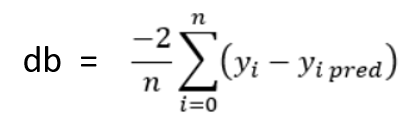



In [2]:
#importing numpy
import numpy as np

**LINEAR REGRESSION**

In [3]:
class Linear_Regression() :

#initiating the parameters :learning rate and no of iterations
  def __init__(self , learning_rate , no_of_iterations): #learning rate and no of iterations are the hyperparameters
    self.learning_rate=learning_rate
    self.no_of_iterations=no_of_iterations

  def fit(self,X,Y):
    #no of training(m) examples and features(n)
    self.m,self.n = X.shape #no of rows m and columns n is no of rows
    #initiating weight and bias value
    self.w = np.zeros(self.n)  #matrix with n columns with all values as 0
    self.b = 0  #bias has only 1 value
    self.X = X
    self.Y = Y

    #implementing gradient descent
    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):
    Y_prediction = self.predict(self.X)

    #calculating gradients
    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m #formula of dw
    db = - 2 * np.sum(self.Y - Y_prediction)/self.m #formula of db

    #updating the weights
    self.w = self.w - self.learning_rate * dw #w=w-a*dw
    self.b = self.b - self.learning_rate * db

  def predict(self,X):
    return X.dot(self.w)+self.b #y=wx+b we do dot product for wx since w is an numpy array






Steps 1: set learning rate and no of iterations, initate random weight and bias values

Step 2:build linear regression equation y=wx+b

step 3:find y_pred value for given x value and weight and bias

step 4: check loss function value at these values

step 5 update parameters using gradient descent

step 6 : repeat till optimal values are reached




In [4]:
#importing
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
#data preprocessing
#loading the data
salary_data=pd.read_csv('/content/salary_data.csv')


In [8]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [9]:
salary_data.shape

(30, 2)

In [10]:
#checking for missing values
salary_data.isnull().sum()


,0
YearsExperience,0
Salary,0


In [11]:
#Splitting feature and target
X=salary_data.iloc[:,:-1].values #seperating thee salary column
Y=salary_data.iloc[:,1].values #seperating experience column
print(X)
print(Y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [12]:
#splitting into training ad test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,random_state=2)

In [25]:
#Training the linear regression model
model=Linear_Regression(learning_rate=0.02,no_of_iterations=1000)

In [26]:
model.fit(X_train,Y_train)

In [27]:
#printing the parameter values(weight and bias)
print('weight = ',model.w)
print('bias = ',model.b)

weight =  [9514.40099904]
bias =  23697.406507136307


y =9514.40099904(x) + 23697.406507136307

salary=9514.40099904(experience) + 23697.406507136307

**Predicting the salary values for test data**

In [28]:
test_data_prediction=model.predict(X_test)

In [29]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


Visualizing predicted and actual values

Text(0, 0.5, 'Salary')

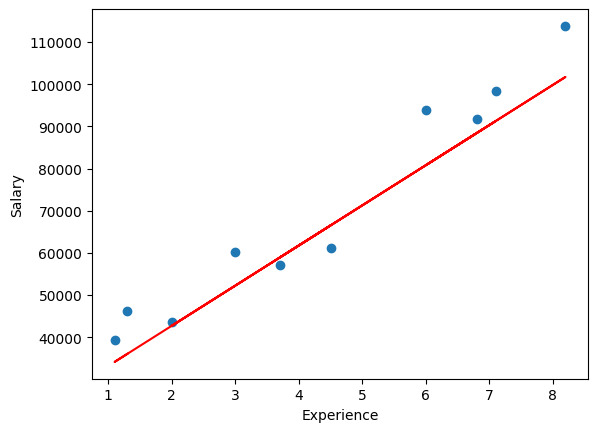

In [30]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,test_data_prediction,color='red')
plt.xlabel('Experience')
plt.ylabel('Salary')
#red dots are the true values
#blue line is the predicted values